In [1]:
# Import Dependencies
import csv
import pandas as pd

# Pull in CSV created from Endpoint API from National Centers for Environmental Information (NCEI)
Temps_CSV = pd.read_csv("https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-summary-of-the-day&dataTypes=LATITUDE,LONGITUDE,TEMP,PRCP&stations=72793024233,99999924233,72295023174,99999923174,72606014764,99999914764,72211012842,99999912842,72258013960,72258113960,72258313960,72270023044,99999923044,72251012924,72640014839,99999914839,72537094847,99999914822,72658014922,99999914922,70026027502,91182022521,72572024127,72434013994,99999913994&startDate=1950-01-01&endDate=2020-10-01&format=csv")

Temps_CSV.head()

,STATION,DATE,LATITUDE,LONGITUDE,PRCP,TEMP
0,72793024233,1950-01-01,47.4444,-122.3138,0.24,30.2
1,72793024233,1950-01-02,47.4444,-122.3138,0.01,21.8
2,72793024233,1950-01-03,47.4444,-122.3138,0.12,13.6
3,72793024233,1950-01-04,47.4444,-122.3138,0.00,23.2
4,72793024233,1950-01-05,47.4444,-122.3138,0.08,25.6


In [2]:
# Import joiner table for Station Names
Temps_Station_Joiner_CSV = pd.read_csv("../csv data/Temps/Temps_Station_Joiner.csv")
Temps_Station_Joiner_CSV = Temps_Station_Joiner_CSV.set_index(["STATION_NO"])
Temps_Station_Joiner_CSV

,STATION_NAME
STATION_NO,
72793024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US"
99999924233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US"
72295023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US"
99999923174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US"
72606014764,"PORTLAND JETPORT, ME US"
99999914764,"PORTLAND JETPORT, ME US"
72211012842,"TAMPA INTERNATIONAL AIRPORT, FL US"
99999912842,"TAMPA INTERNATIONAL AIRPORT, FL US"
72258013960,"DALLAS FAA AIRPORT, TX US"


In [3]:
# Combine dataset with joiner table to get proper names accross multiple station numbers at same location
Clean_Temps_CSV = Temps_CSV.join(Temps_Station_Joiner_CSV, on=["STATION"])
# Create Temps Groupby Object
Temps_GB = Clean_Temps_CSV.groupby(Clean_Temps_CSV["STATION_NAME"])
# Confirm full range of data for each Station
# Note: A period of time between 9/19/2003 and 1/1/2004 is missing for Barrow(Alaska), however the 3 month period is minimal over the 7 decade spread of data
Temps_test_df = Temps_GB["DATE"].count()
Temps_test_df

STATION_NAME
BARROW WEATHER SERVICE OFFICE AIRPORT, AK US        25738
CORPUS CHRISTI INTERNATIONAL AIRPORT, TX US         25842
DALLAS FAA AIRPORT, TX US                           25843
DETROIT METRO AIRPORT, MI US                        25842
EL PASO INTERNATIONAL AIRPORT, TX US                25842
HONOLULU INTERNATIONAL AIRPORT, HI US               25842
LOS ANGELES INTERNATIONAL AIRPORT, CA US            25842
MILWAUKEE MITCHELL INTERNATIONAL AIRPORT, WI US     25842
MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US    25842
PORTLAND JETPORT, ME US                             25842
SALT LAKE CITY INTERNATIONAL AIRPORT, UT US         25842
SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US         25842
ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US       25842
TAMPA INTERNATIONAL AIRPORT, FL US                  25842
Name: DATE, dtype: int64

In [4]:
Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 99999914822]["LATITUDE"]

2920      42.40917
2921      42.40917
2922      42.40917
2923      42.40917
2924      42.40917
            ...   
115779    42.40917
115780    42.40917
115781    42.40917
115782    42.40917
115783    42.40917
Name: LATITUDE, Length: 8401, dtype: float64

In [5]:
Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 72537094847]["LATITUDE"].min()

42.2313

In [6]:
# A portion of data was missing from Detroit Metro Airport and was supplemented by Detroit City Airport
# Since these two airports are ~20 miles appart, we will substitue Detroit Metro's Latitude for consistentcy
Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 99999914822, "LATITUDE"] = Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 72537094847]["LATITUDE"].min()
an_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 99999914822, "LONGITUDE"] = Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 72537094847]["LONGITUDE"].min()
# Confirm update
Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 99999914822]["LATITUDE"]

NameError: name 'an_Temps_CSV' is not defined

In [10]:
Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 99999914822, "LONGITUDE"]

2920     -83.01
2921     -83.01
2922     -83.01
2923     -83.01
2924     -83.01
          ...  
115779   -83.01
115780   -83.01
115781   -83.01
115782   -83.01
115783   -83.01
Name: LONGITUDE, Length: 8401, dtype: float64

In [11]:
Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 72537094847]["LONGITUDE"].min()

-83.3308

In [12]:
# A portion of data was missing from Detroit Metro Airport and was supplemented by Detroit City Airport
# Since these two airports are ~20 miles appart, we will substitue Detroit Metro's longitude for consistentcy
Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 99999914822, "LONGITUDE"] = Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 72537094847]["LONGITUDE"].min()
# Confirm update
Clean_Temps_CSV.loc[Clean_Temps_CSV["STATION"] == 99999914822]["LONGITUDE"]

2920     -83.3308
2921     -83.3308
2922     -83.3308
2923     -83.3308
2924     -83.3308
           ...   
115779   -83.3308
115780   -83.3308
115781   -83.3308
115782   -83.3308
115783   -83.3308
Name: LONGITUDE, Length: 8401, dtype: float64

STATION_NAME
BARROW WEATHER SERVICE OFFICE AIRPORT, AK US        AxesSubplot(0.125,0.125;0.775x0.755)
CORPUS CHRISTI INTERNATIONAL AIRPORT, TX US         AxesSubplot(0.125,0.125;0.775x0.755)
DALLAS FAA AIRPORT, TX US                           AxesSubplot(0.125,0.125;0.775x0.755)
DETROIT METRO AIRPORT, MI US                        AxesSubplot(0.125,0.125;0.775x0.755)
EL PASO INTERNATIONAL AIRPORT, TX US                AxesSubplot(0.125,0.125;0.775x0.755)
HONOLULU INTERNATIONAL AIRPORT, HI US               AxesSubplot(0.125,0.125;0.775x0.755)
LOS ANGELES INTERNATIONAL AIRPORT, CA US            AxesSubplot(0.125,0.125;0.775x0.755)
MILWAUKEE MITCHELL INTERNATIONAL AIRPORT, WI US     AxesSubplot(0.125,0.125;0.775x0.755)
MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT, MN US    AxesSubplot(0.125,0.125;0.775x0.755)
PORTLAND JETPORT, ME US                             AxesSubplot(0.125,0.125;0.775x0.755)
SALT LAKE CITY INTERNATIONAL AIRPORT, UT US         AxesSubplot(0.125,0.125;0.775x0.755)
SEATTLE 

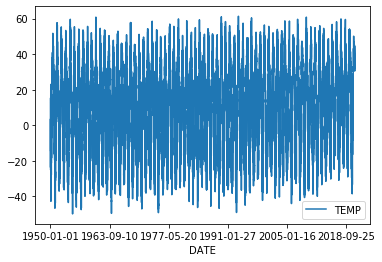

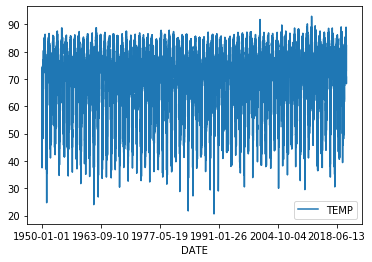

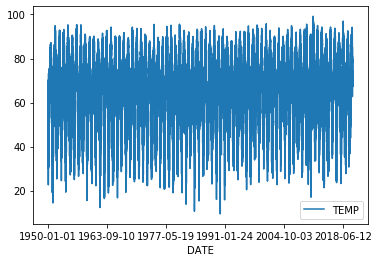

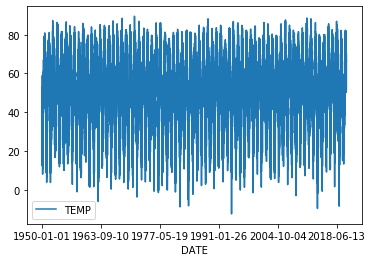

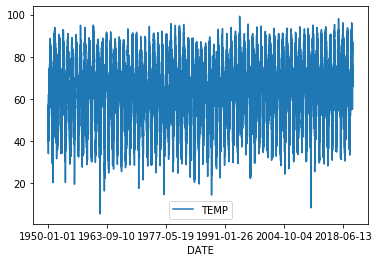

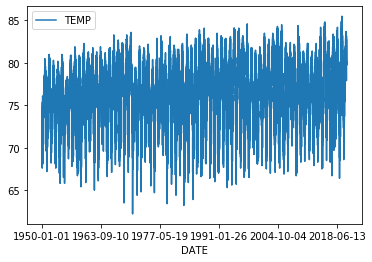

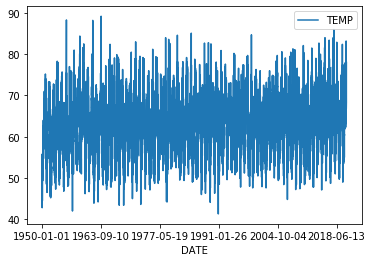

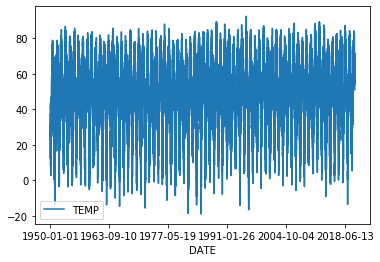

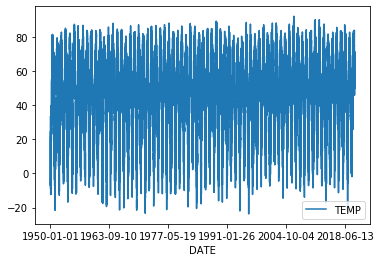

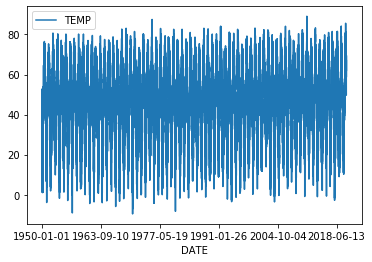

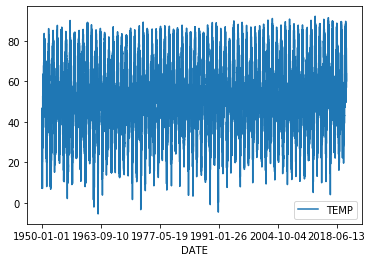

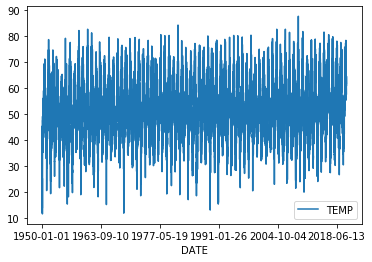

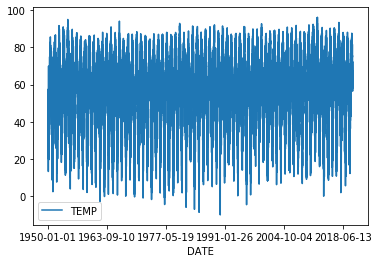

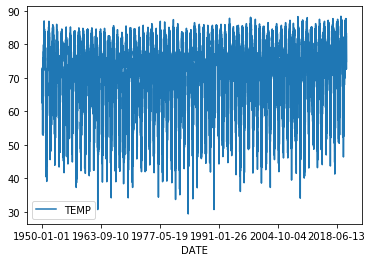

In [23]:

Plot_Temps = Clean_Temps_CSV[["STATION_NAME","DATE","TEMP"]]
Plot_Temps = Plot_Temps.set_index(["DATE"])
Plot_Temps_GB = Plot_Temps.groupby("STATION_NAME")
Plot_Temps_GB.plot()